In [0]:
import os
os.chdir("drive/My Drive/colab")

In [0]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data=pd.read_csv("breast_cancer_data.csv")
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)
data.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
data = data.values
x = data[ : , 1:]
y = data[ : , 0]
print(x.shape, y.shape)

(569, 30) (569,)


In [0]:
x_train_val, x_test_val, y_train_val, y_test_val = train_test_split(x, y, test_size = 0.20, random_state=123)
print(x_train_val.shape,
     y_train_val.shape,
     x_test_val.shape,
     y_test_val.shape)

(455, 30) (455,) (114, 30) (114,)


In [0]:
clf = XGBClassifier()
clf.fit(x_train_val, y_train_val)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pred = clf.predict(x_test_val)
print(pred, y_test_val, sep = '\n')

['B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M']
['B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B'
 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B'
 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'M']


In [0]:
print("Accuracy of model is: ", accuracy_score(y_test_val, pred))

Accuracy of model is:  0.9824561403508771


              precision    recall  f1-score   support

           B       0.99      0.99      0.99        73
           M       0.98      0.98      0.98        41

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



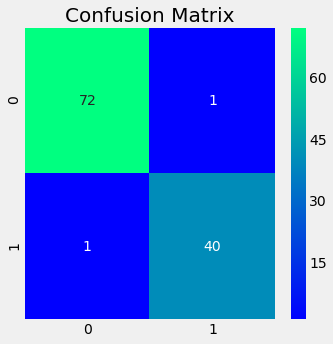

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
cr = classification_report(y_test_val, pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test_val, pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()